In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\CNN\ml\modular\ml-class\Data\rock_density_xray.csv")

In [4]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']
df.columns

Index(['Signal', 'Density'], dtype='object')

<AxesSubplot:xlabel='Signal', ylabel='Density'>

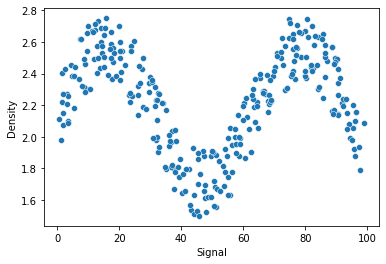

In [6]:
sns.scatterplot(x = 'Signal', y = 'Density', data =df)

In [8]:
#Linear Regression

In [9]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [10]:

from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()

In [14]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [18]:

np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [19]:
signal_range = np.arange(0,100)
signal_preds = lr_model.predict(signal_range.reshape(-1,1))
signal_preds

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

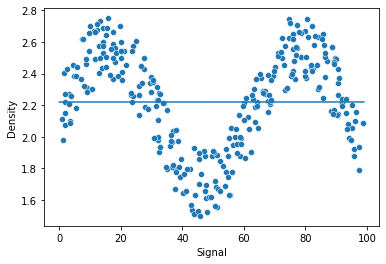

In [20]:
sns.scatterplot(x = 'Signal', y = 'Density', data =df)
plt.plot(signal_range, signal_preds)

In [21]:
#Polynomial Regression

In [22]:
def run_model(model, X_train, y_train, X_test, y_test):

    #Fit the model to training dataset
    model.fit(X_train, y_train)
    #performance metric
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae =  mean_absolute_error(y_test, preds)
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')

    # Plot Results Model signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))

    sns.scatterplot(x = 'Signal', y = 'Density', data =df, color = 'green')
    plt.plot(signal_range, signal_preds)

RMSE: 0.2570051996584629
MAE: 0.211198973318633


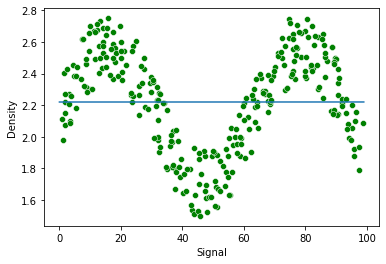

In [23]:
model = LinearRegression() # It is not applicable
run_model(model, X_train, y_train, X_test, y_test)


In [24]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [25]:
pipe = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression()) #It is not performing well

RMSE: 0.2817309563725596
MAE: 0.22903105443511335


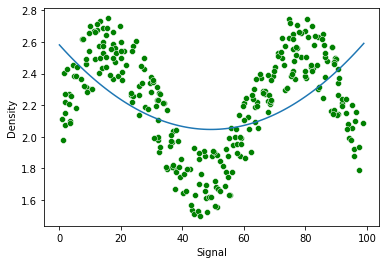

In [26]:

run_model(pipe, X_train, y_train, X_test, y_test )

RMSE: 0.13807520077544255
MAE: 0.11969168045531736


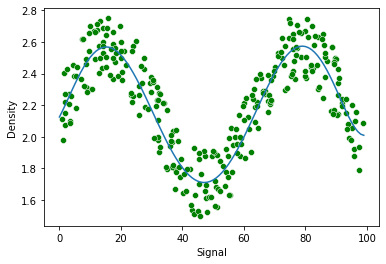

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression()) #performing well
run_model(pipe, X_train, y_train, X_test, y_test )

In [28]:

from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


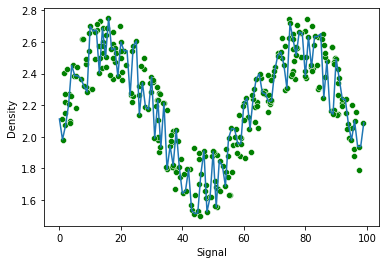

RMSE: 0.13730685016923647
MAE: 0.12198383614100558


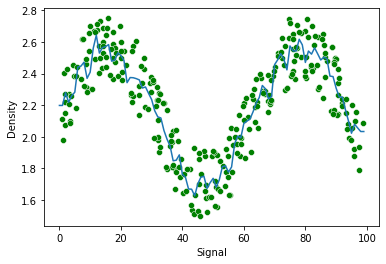

RMSE: 0.13277855732740926
MAE: 0.11635971693292672


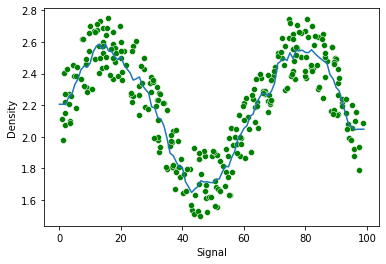

RMSE: 0.15954234753677107
MAE: 0.13363165935705318


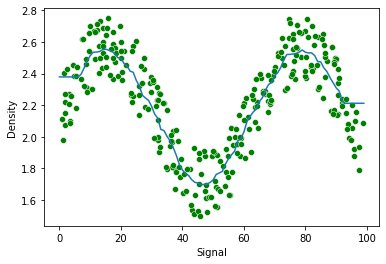

In [29]:
k_values = [1,5,10,30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)
    plt.show()
    #for k =1 overfittig 

In [30]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAE: 0.11877297474442378


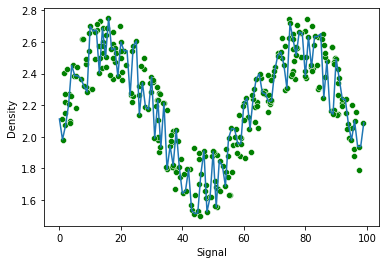

In [31]:
model =  DecisionTreeRegressor() # Not performing well(high variance)
run_model(model, X_train, y_train, X_test, y_test) #overfittig 

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [33]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 100], 'gamma': ['auto', 'scale']}
grid_model = GridSearchCV(svr, param_grid)

RMSE: 0.13015742723601528
MAE: 0.11243103141068958


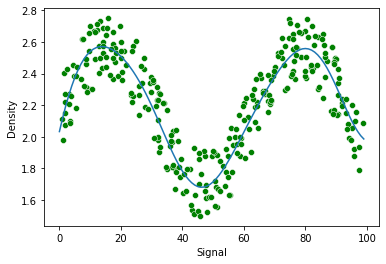

In [34]:

run_model(grid_model, X_train, y_train, X_test, y_test) #Performing well

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor(n_estimators = 10)

RMSE: 0.13527573739471305
MAE: 0.11723403983275278


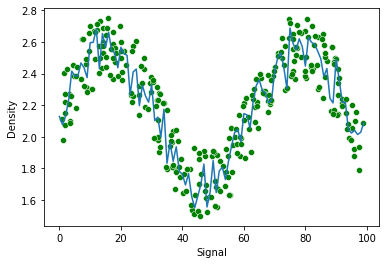

In [37]:

run_model(rf,X_train, y_train, X_test, y_test) #Not performing well
#overfittig 

In [38]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MAE: 0.11318284854800689


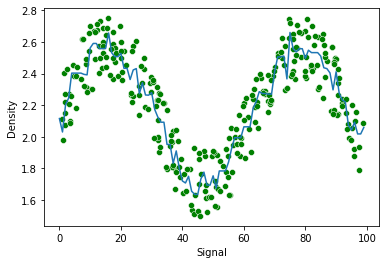

In [39]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

RMSE: 0.1407038813457384
MAE: 0.12214615345825845


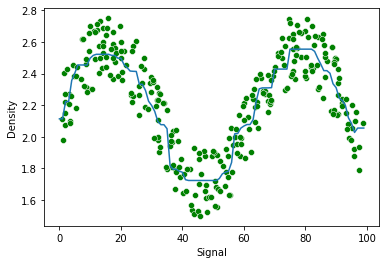

In [40]:

model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)